In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns

plt.style.use(['seaborn-colorblind', 'seaborn-paper'])
%matplotlib inline

In [2]:
with open('dtypes.pickle', 'rb') as handle:
    my_data_types = pickle.load(handle)

In [3]:
del my_data_types['year']

In [4]:
my_data_types

{'category': dtype('O'),
 'commodity': dtype('O'),
 'country_or_area': dtype('O'),
 'modifier': dtype('O'),
 'quantity': dtype('float64'),
 'transaction': dtype('O'),
 'unit': category}

In [5]:
edf = pd.read_csv('energy_p3.csv', parse_dates=['year'], dtype=my_data_types)

In [6]:
edf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189482 entries, 0 to 1189481
Data columns (total 8 columns):
country_or_area    1189482 non-null object
year               1189482 non-null datetime64[ns]
unit               1189482 non-null category
quantity           1189482 non-null float64
category           1189482 non-null object
commodity          1189482 non-null object
transaction        1183699 non-null object
modifier           47472 non-null object
dtypes: category(1), datetime64[ns](1), float64(1), object(5)
memory usage: 64.7+ MB


In [7]:
edf.sample(5)

,country_or_area,year,unit,quantity,category,commodity,transaction,modifier
183376,Dem. Rep. of the Congo,1997-12-31,thousand metric tons,301.0,conventional crude oil,conventional crude oil,total energy supply,NaN
1081994,Venezuela (Bolivar. Rep.),2004-12-31,million kilowatt-hours,0.0,total electricity,electricity,"consumption in agriculture, forestry and fishing",NaN
650867,Brazil,2005-12-31,thousand metric tons,511.0,liquified petroleum gas,liquefied petroleum gas (lpg),imports,NaN
1011332,Bulgaria,1999-12-31,thousand metric tons,82.0,refinery gas,refinery gas,energy industries own use,NaN
893248,State of Palestine,1991-12-31,thousand metric tons,1.0,other kerosene,other kerosene,"consumption by manufacturing, construction and...",NaN


In [8]:
edf[(edf.country_or_area == 'China') & (edf.transaction == 'imports')]

,country_or_area,year,unit,quantity,category,commodity,transaction,modifier
65892,China,2014-12-31,thousand metric tons,4110.200,bitumen,bitumen,imports,NaN
65893,China,2013-12-31,thousand metric tons,3324.900,bitumen,bitumen,imports,NaN
65894,China,2012-12-31,thousand metric tons,2731.300,bitumen,bitumen,imports,NaN
65895,China,2011-12-31,thousand metric tons,3190.200,bitumen,bitumen,imports,NaN
65896,China,2010-12-31,thousand metric tons,4077.000,bitumen,bitumen,imports,NaN
65897,China,2009-12-31,thousand metric tons,3334.000,bitumen,bitumen,imports,NaN
65898,China,2008-12-31,thousand metric tons,3227.800,bitumen,bitumen,imports,NaN
65899,China,2007-12-31,thousand metric tons,3565.100,bitumen,bitumen,imports,NaN
65900,China,2006-12-31,thousand metric tons,1380.000,bitumen,bitumen,imports,NaN
65901,China,2005-12-31,thousand metric tons,918.000,bitumen,bitumen,imports,NaN


In [9]:
usa_crude_exports = edf[
    (edf.country_or_area == 'United States') & 
    (edf.commodity == 'conventional crude oil') & 
    (edf.transaction == 'exports')
]

In [10]:
usa_crude_exports.index = usa_crude_exports['year']

In [11]:
del usa_crude_exports['year']

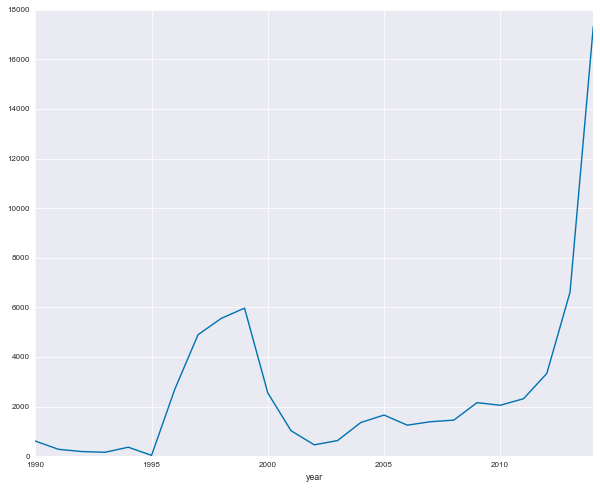

In [12]:
usa_crude_exports.iloc[::-1].quantity.plot(figsize=(10, 8))

In [13]:
usa_crude_imports = edf[
    (edf.country_or_area == 'United States') &
    (edf.commodity == 'conventional crude oil') & 
    (edf.transaction == 'imports')
]

In [14]:
usa_crude_imports.index = usa_crude_imports.year

In [15]:
del usa_crude_imports['year']

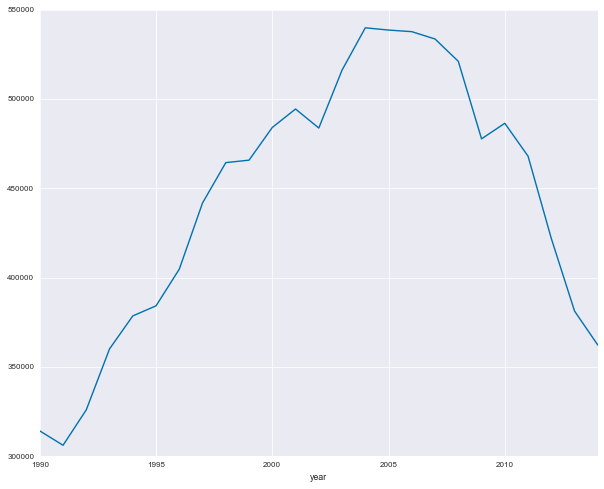

In [16]:
usa_crude_imports.iloc[::-1].quantity.plot(figsize=(10,8))

In [18]:
usa_net_crude = pd.merge(
    edf[
        (edf.country_or_area == 'United States') & 
        (edf.commodity == 'conventional crude oil') & 
        (edf.transaction == 'exports')
    ][['year', 'quantity']],
    edf[
        (edf.country_or_area == 'United States') &
        (edf.commodity == 'conventional crude oil') & 
        (edf.transaction == 'imports')
    ][['year', 'quantity']],
    on='year',
    how='inner',
    suffixes=('_exports', '_imports')
)

In [19]:
usa_net_crude['net_imports'] = usa_net_crude.quantity_imports - usa_net_crude.quantity_exports

In [23]:
usa_net_crude.head(5)

,quantity_exports,quantity_imports,net_imports
year,,,
2014-12-31,17329.0,362247.0,344918.0
2013-12-31,6617.0,381281.0,374664.0
2012-12-31,3337.0,421945.0,418608.0
2011-12-31,2318.0,468038.0,465720.0
2010-12-31,2054.0,486442.0,484388.0


In [20]:
usa_net_crude.index = usa_net_crude.year

In [21]:
del usa_net_crude['year']

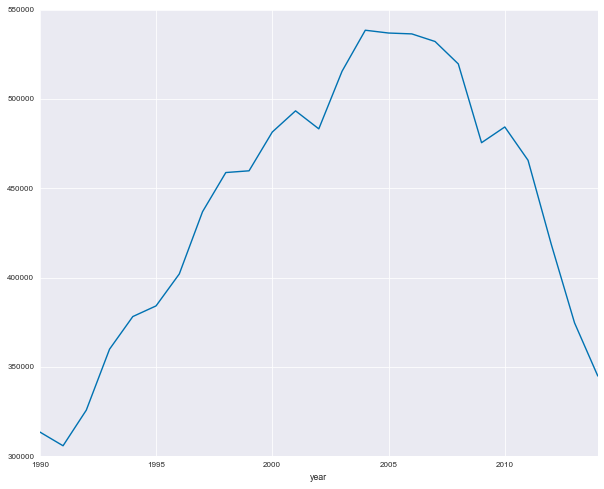

In [22]:
usa_net_crude.iloc[::-1].net_imports.plot(figsize=(10, 8))